Question 1:

The "standard deviation of the original data" is the square root of variance of the origianl population.

The "standard error of the mean", in ideal circumstances, is the "standard deviation" of a different, hypothetical "population" -- the sampling distribution of the sample mean.

Which is generated by repeated, independent sampling from the same population and recording of the sample means obtained.

In a sense, their difference can be percieved as that they are the results of the same method performed on different datasets.

In real life, however, the standard error is often estimated by the formula SE= (Sample Standard deviation)/(Sample Size), using a single sample.

The "standard deviation of the original data" captures the idea of how spread out the original values are around the population mean. The larger the deviation, the further the values spread. The samller the deviation, the closer the values tend to be around the mean.

The "standard error" captures how accurate is the sample mean as an estimation of the population mean. the samller the error, the closer the sample mean is around the population mean, therefore the more accuracy it has. The larger the error, the further the sample mean lies from the population mean, the less accurate it is.

Question 2:

We use the "standard error of the mean" to create a 95% confidence interval, which "covers 95% of the bootstrapped sample means", using the following approach: 

CI = Sample Mean ± 1.96×SE

To be concise, the 95% confidence interval will be [Sample Mean  -  1.96 SE , Sample Mean  +  1.96 SE]

This is because:

1.According to the the z-score table, around 95% percent of the data following a normal distribution falls between 1.96 standard deviations below and 1.96 standard deviations above the mean.

2.According to the Central Limit Theorem, the sampling distribution of the sample mean would follow the normal distribution.

3.The Standard Error of the mean (SE) is the standard deviation of the sampling distribution of the sample mean.

4.Therefore,95% of the data of the the sampling distribution of the sample mean would fall between the range of  Sample Mean ± 1.96×SE, making it the 95% Confidence Interval.

5.The boostrapped sampling distribution, given a large sample size, is a good approximation of the sampling distribution of the sample mean.

6.Therefore, the interval [Sample Mean  -  1.96 SE , Sample Mean  +  1.96 SE] would capture approximately 95% of the values in the dataset of all the boostrapped means as well.

QED.



Question 3: 

We can create a 95% bootstrapped confidence interval using the bootstrapped means by finding the 2.5th and 97.5th percentile, and constructing a closed interval between them.

This is because sine the 2.5th percentile covers the lower 2.5% of the data while the 97.5th covers the lower 97.5% of the data, and 97.5%-2.5%=95%, the interval np.quantile(bootstrapped_stats, [0.025, 0.975]) would cover the middle 95% of the data. Hence it will be the 95% Confidence interval.



In [2]:
#Question 4:

import numpy as np
import pandas as pd

# Step 1: Create or load a sample dataset
# Example sample data 
sample_data = np.array([5, 7, 8, 10, 15, 17, 20, 25])

# Step 2: Define the number of bootstrap resamples
n_bootstraps = 1000

# Step 3: Bootstrap function to calculate the sample statistic
def bootstrap_ci(data, stat_function, n_bootstraps=1000, ci=95):
    """
    data: the original sample data
    stat_function: the function to calculate the statistic (e.g., mean, median)
    n_bootstraps: the number of bootstrap resamples
    ci: confidence level (default is 95%)
    """
    # Store bootstrap statistics
    bootstrapped_stats = np.zeros(n_bootstraps)

    # Step 4: Create bootstrap resamples and calculate the statistic for each resample
    for i in range(n_bootstraps):
        # Resample the original data with replacement
        resample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the statistic (mean, median, etc.) on the resampled data
        bootstrapped_stats[i] = stat_function(resample)

    # Step 5: Compute the confidence interval from bootstrapped statistics
    # Percentiles for the confidence interval
    lower_bound = (100 - ci) / 2
    upper_bound = 100 - lower_bound
    # Calculate the bounds for the confidence interval
    ci_lower = np.percentile(bootstrapped_stats, lower_bound)
    ci_upper = np.percentile(bootstrapped_stats, upper_bound)
    
    return (ci_lower, ci_upper)

# Step 6: Calculate a 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(sample_data, np.mean, n_bootstraps=1000, ci=95)
print(f"95% Bootstrap Confidence Interval for the Population Mean: {mean_ci}")

# --------------------------
# To calculate a 95% bootstrap confidence interval for another statistic (e.g., median):
# Change the 'np.mean' in the 'bootstrap_ci' call to 'np.median'

# Step 7: Calculate a 95% bootstrap confidence interval for the population median
median_ci = bootstrap_ci(sample_data, np.median, n_bootstraps=1000, ci=95)
print(f"95% Bootstrap Confidence Interval for the Population Median: {median_ci}")


95% Bootstrap Confidence Interval for the Population Mean: (9.246875, 18.128124999999997)
95% Bootstrap Confidence Interval for the Population Median: (7.0, 20.0)


For Question 1 to 4: https://chatgpt.com/share/66fda6ce-e55c-800d-af84-5850ef907992

Here's a brief summary of our conversation so far:

Early Questions (Week_04 and Bootstrapping):
Introduction to Bootstrapping and Sampling:

We discussed the concept of bootstrapping, specifically how it works in resampling data to estimate the sampling distribution of a statistic like the sample mean. We touched upon the importance of standard error and confidence intervals in statistical inference.
You asked about how increasing the sample size affects the sampling distribution of the mean, leading to a narrower distribution as the sample size grows (decreasing the standard error).
Clarification on Standard Error and Confidence Intervals:

We explored the meaning of standard error, how it is calculated as the sample standard deviation divided by the square root of the sample size, and how it's used to form confidence intervals.
We then moved into a discussion about confidence intervals and the difference between using the sample mean versus the mean of the bootstrapped sampling distribution. You sought clarification on when to use the standard error formula versus bootstrapping.
How Confidence Intervals Work:

We delved deeper into the interpretation of confidence intervals, noting that 95% of confidence intervals from repeated sampling would contain the true population parameter, and how this applies to bootstrapped confidence intervals as well.
You asked about creating confidence intervals for statistics other than the mean (e.g., the median), which led to a conversation on using bootstrapping for other parameters.
Bootstrapping Code Explanation:

I provided you with detailed Python code to create a 95% bootstrap confidence interval for the mean, and then explained how the code can be easily adapted to calculate confidence intervals for other statistics (like the median, standard deviation, etc.).
We discussed how bootstrapping works without assuming a known distribution, by resampling and calculating the statistic of interest multiple times.
Clarification of Confidence Interval Boundaries:

You asked whether confidence intervals are open or closed intervals, and I explained that they are generally considered closed intervals (including both the lower and upper bounds).
We also clarified the difference between the empirical rule (68-95-99.7 rule) and the z-score rule, emphasizing that the z-score (e.g., 1.96 for 95%) provides more precise bounds for confidence intervals in the normal distribution.
Final Discussion on Bootstrapping Video:

You shared a transcript of a video about bootstrapping, and I reviewed it in full. We discussed how the video explained bootstrapping as a resampling technique to calculate statistics like the mean and median, and how bootstrapping can be used to generate confidence intervals.
I summarized the video and emphasized the flexibility of bootstrapping for different statistics beyond just the mean, highlighting the key steps in bootstrapping and its power in handling various types of statistics.
Overall Themes:
We’ve covered the core concepts of bootstrapping, the standard error, and confidence intervals, emphasizing their role in statistical analysis.
You've gained an understanding of how to compute confidence intervals both through traditional methods and bootstrapping.
I provided coding examples and explanations of how to use bootstrapping to calculate confidence intervals for different statistics (like the mean and median).
This summary should give you a clear overview of our conversation so far. Let me know if you'd like any further clarification!

Question 5: 

We need to distinguish between the role of population parameters and sample statisics in the context of confident intervals because they are fundamentally different, and such difference is crucial for understanding confidence intervals.

In real life situations, population parameters are unknown, which is why we calculate samples statistics as estimates of these parameters. However, these estimations might not be accurate, so the standard error and the confidence interval help us measure that uncertainty: the standard error quantifies the variability of the statistic, while the confidence interval provides a range of possible values for the parameter based on that variability.

In short words, the population paramter is what we aim to know, while the sample statistic is what we observe and use, along with the confidence interval, to make our best guess at the parameter.

Question 6:

A: The Process of Bootsrapping: We repeatedly sample from a single sample, with replacement, using the same sample size to create a large number of "pretend-samples." We also record the sample statistics obtained from each of these "pretend-samples."

B: The main purpose of bootstrapping is to generate a collection of many sample statistics and observe their distribution, which is called the "bootstrapped sampling distribution." The goal is to mimic what would happen if we could take infinitely many independent samples from the original population, record the statistic of each one, and observe the distribution of those statistics. That distribution is called "the theoretical sampling distribution of the sample statistic." This mimicking helps us make better estimates about the population parameter when we have only one sample.

C: Yes. First, I would draw 1,000 bootstrapped samples from the original sample and record the sample mean of each. Second, I would find the interval between the 2.5th percentile and the 97.5th percentile of my bootstrapped means. This interval captures the middle 95% of all the values, making it the 95% confidence interval of the sample mean. Finally, I would check whether my original guess falls within that interval. If it does, then my guess is plausible. If it doesn't, then it’s not plausible.

Question 7:
    The null hypothesis essentially states that the population mean is zero. A 95% Confidence Interval overlapping zero fails to reject the null hypothesis because it includes zero as one of the possible values for the population mean. Even though the sample mean isn't zero ,the fact that zero is within the interval means that, based on the data, we can't rule out the possibility that it is the true population mean. 
    Alternatively, if zero falls out of the 95% confidence interval, it would reject the null hypothesis because in that situation, the possibility of zero being the true population mean is so small that it has no significance. Therefore, the hypothesis can be considered false.

For Question 5~7: https://chatgpt.com/share/66ff0b5e-b104-800d-8b69-d50300f8cc00

Here's a summary of our conversation so far:

Initial Answer Review: You asked for feedback on an answer regarding the distinction between population parameters and sample statistics in the context of confidence intervals. I suggested making the answer more concise and clear, emphasizing the roles of the two concepts in statistical inference.

Refining Your Answer: We worked on improving your explanations, focusing on clarity, grammar, and conceptual accuracy. I provided suggestions for rephrasing and refining your answers to make them more precise and aligned with statistical terminology, while ensuring they were still accessible.

Bootstrapping Explanation: You asked for feedback on an explanation of bootstrapping. I evaluated your response based on a rubric, noting that while the explanation was mostly accurate, some terms could be simplified, and there were minor grammar issues. We then worked on refining the explanation for clarity.

"Plausible" Explanation: You asked for a simple explanation of the term "plausible." I provided an explanation using relatable language suitable for a younger audience.

Hypothesis Testing and Confidence Intervals: You provided an answer about why a confidence interval overlapping zero leads to failing to reject the null hypothesis. I gave feedback, noting minor grammatical issues and suggested rephrasing to improve clarity and precision, particularly for a statistics-engaged audience.

Context Update: You clarified that the audience for the answer was not a non-statistics group. Based on this, I adjusted the feedback to focus more on clarity, terminology, and statistical rigor, rather than simplifying the explanation for beginners.

Final Evaluation: I evaluated your refined answer, noting it was well-suited for a statistics-literate audience. I highlighted minor grammatical corrections but otherwise confirmed the response was logically sound and earned full marks based on the provided rubric.

This has been the general flow of our discussion, focusing on refining your answers for clarity, accuracy, and correct use of statistical terminology.








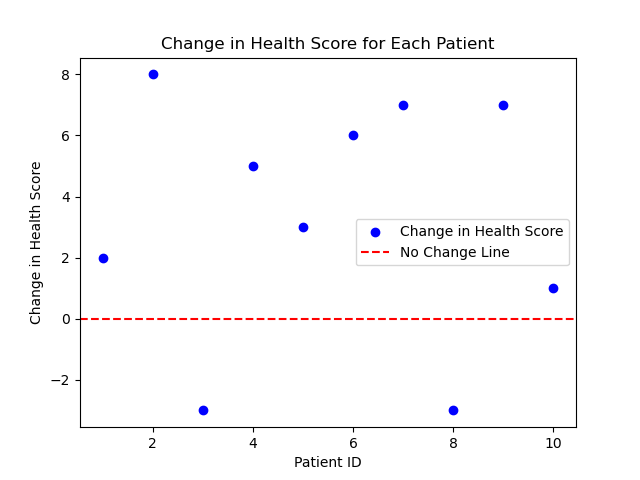

We are aiming to help determine whether or not the vaccine has a significant effect on people's health. 
To analyze, the key value of interest is how people's health scores have changed after taking the vaccine. 
Therefore, we created the dataset of 'Change in Health Score' from our data as our given sample. 
To determine whether the vaccine has an effect, we will need to determine if we can reject 
'The Null Hypothesis of "no effect"' based on our data. 
"The Null hypothesis" is true if the population mean is zero.
In this context, 'a Null Hypothesis' means the hypothesis that the vaccine 
will have no significant impact on everyone's health on average.
We can never know if the Null hypothesis is really true,
since we cannot let every human alive take the vaccine
and calculate the real population mean.
However, we will decide if it can be considered false ("rejected")
by checking whether the value of zero falls out of the 95% confidence interval of the mean 
constructed using our data

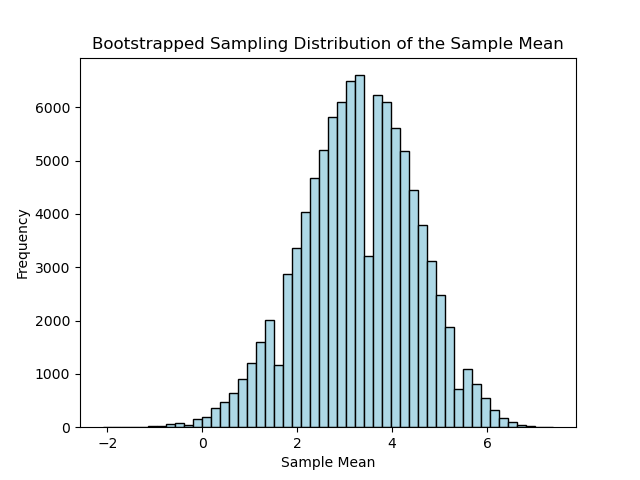

We have generated 100000 bootstrap samples from the original sample
and vsiualzied the bootstrapped sampling distribution of the boostrapped means.
Its purpose is to visualize the level of uncertainty of our sample mean 
as an estimate of the population mean
at this given sample size of 10. 
More importantly, it will help us construct the 95% confidence interval.


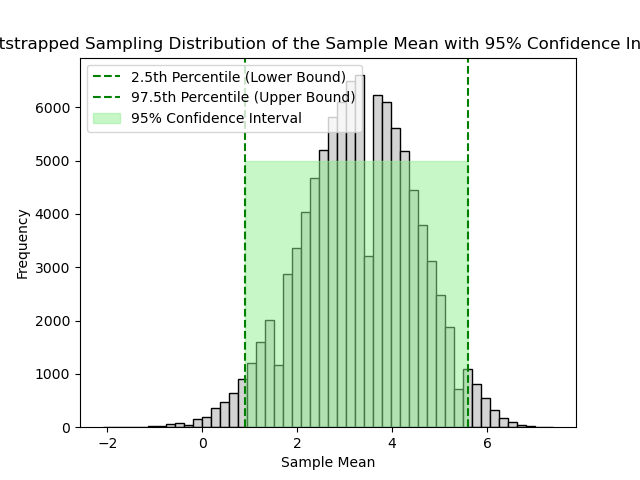

95% Confidence Interval: [0.9 5.6]
We used the [2.5th percentile, 97.5th percentile] interval on the bootstrapped mean as the 95% CI. 
0 does not fall within the 95% CI of the sample mean. Therefore, our test rejects the null hypothesis.

Further Considerations:
The results are promising. We have enough evidence to confidently conclude that the vaccine is effective, 
since the null hypothesis is rejected, ruling out the possibility of "having no effect on average."
Due to the optimistic outlook ,I would suggest the company to consider investing more into this vaccine,
Conducing larger tests and supporting further development & improvements.


In [12]:
#Question 8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Read the CSV file
data = pd.read_csv("vaccine_data.csv")

# Create the 'Change in Health Score' column
data['Change in Health Score'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Scatter plot of the 'Change in Health Score'
plt.scatter(data['PatientID'], data['Change in Health Score'], color='blue', label='Change in Health Score')
plt.title('Change in Health Score for Each Patient')
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.axhline(y=0, color='red', linestyle='--', label='No Change Line')
plt.legend()
plt.savefig('scatter_plot_health_change.png')  # Save plot as PNG
plt.close()

# Display the saved PNG image
display(Image(filename='scatter_plot_health_change.png'))

# Print explanation
print("""We are aiming to help determine whether or not the vaccine has a significant effect on people's health. 
To analyze, the key value of interest is how people's health scores have changed after taking the vaccine. 
Therefore, we created the dataset of 'Change in Health Score' from our data as our given sample. 
To determine whether the vaccine has an effect, we will need to determine if we can reject 
'The Null Hypothesis of "no effect"' based on our data. 
"The Null hypothesis" is true if the population mean is zero.
In this context, 'a Null Hypothesis' means the hypothesis that the vaccine 
will have no significant impact on everyone's health on average.
We can never know if the Null hypothesis is really true,
since we cannot let every human alive take the vaccine
and calculate the real population mean.
However, we will decide if it can be considered false ("rejected")
by checking whether the value of zero falls out of the 95% confidence interval of the mean 
constructed using our data.""")

# Part 2: Analysis

# Set random seed for reproducibility
np.random.seed(42)

# Bootstrapping: generate 100,000 samples
bootstrap_means = []
for _ in range(100000):
    sample = data['Change in Health Score'].sample(n=len(data), replace=True)
    bootstrap_means.append(sample.mean())

# Convert to a DataFrame for visualization and analysis
bootstrap_means = pd.Series(bootstrap_means)


# Visualize the bootstrap distribution
plt.hist(bootstrap_means, bins=50, color='lightblue', edgecolor='black')
plt.title('Bootstrapped Sampling Distribution of the Sample Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.savefig('bootstrap_distribution.png')  # Save plot as PNG
plt.close()

# Display the saved PNG image
display(Image(filename='bootstrap_distribution.png'))

# Print explanation
print("""We have generated 100000 bootstrap samples from the original sample
and vsiualzied the bootstrapped sampling distribution of the boostrapped means.
Its purpose is to visualize the level of uncertainty of our sample mean 
as an estimate of the population mean
at this given sample size of 10. 
More importantly, it will help us construct the 95% confidence interval.""")

# Calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])


# Visualize the bootstrap distribution with confidence interval
plt.hist(bootstrap_means, bins=50, color='lightgray', edgecolor='black')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='2.5th Percentile (Lower Bound)')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='97.5th Percentile (Upper Bound)')
plt.fill_betweenx([0, 5000], confidence_interval[0], confidence_interval[1], color='lightgreen', alpha=0.5, label='95% Confidence Interval')
plt.title('Bootstrapped Sampling Distribution of the Sample Mean with 95% Confidence Interval')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bootstrap_distribution_with_ci.png')  # Save plot as PNG
plt.close()

# Display the saved PNG image
display(Image(filename='bootstrap_distribution_with_ci.png'))

print(f"95% Confidence Interval: {confidence_interval}")


# Final print statement
print("""We used the [2.5th percentile, 97.5th percentile] interval on the bootstrapped mean as the 95% CI. 
0 does not fall within the 95% CI of the sample mean. Therefore, our test rejects the null hypothesis.""")
print("")

print("""Further Considerations:
The results are promising. We have enough evidence to confidently conclude that the vaccine is effective, 
since the null hypothesis is rejected, ruling out the possibility of "having no effect on average."
Due to the optimistic outlook ,I would suggest the company to consider investing more into this vaccine,
Conducing larger tests and supporting further development & improvements.""")




For Question 8: https://chatgpt.com/share/66ff39db-033c-800d-98c6-404a3044b4e5

Summary:

You shared a Python homework project focused on analyzing vaccine data, where AliTech created a vaccine to improve people's health. The goal was to determine if the vaccine has a significant effect, using the given patient data. You outlined specific steps for generating a "Change in Health Score" column, visualizing the data with scatter plots, performing bootstrapping to create a sampling distribution of the sample mean, and calculating a 95% confidence interval.

I provided you with the Python code that:
- Created and saved visualizations as PNG files.
- Generated 100,000 bootstrapped samples to calculate the 95% confidence interval.
- Displayed results using histograms and confidence intervals to help decide whether to reject the null hypothesis.
- Rejected the null hypothesis since 0 was outside the 95% confidence interval.

I then evaluated your submission using a rubric, noting that your code and analysis were clear, appropriate, and aligned with the project's guidelines, suggesting a grade of full marks. Finally, I highlighted minor improvements, such as including standard error explanations and mentioning possible limitations of the data.